In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


#standard imports
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

#rl book imports
import rl
from rl.markov_decision_process import MarkovDecisionProcess
from rl.markov_process import State, MarkovProcess, NonTerminal, Terminal

from typing import (Callable, Dict, Generic, Iterator, Iterable, List,
                    Mapping, Optional, Sequence, Tuple, TypeVar, overload)

from rl.distribution import Categorical, Distribution, Constant, Choose
from rl.policy import Policy
from rl.monte_carlo import epsilon_greedy_policy, greedy_policy_from_qvf, glie_mc_control, mc_prediction
from rl.function_approx import LinearFunctionApprox, AdamGradient
from rl.td import glie_sarsa, q_learning


#custom imports 
import utils as u
import data as dat
import mdp_agent as ag
import baseline_policies as bp
import q_plots as qp
import backtest as btest

from sklearn.linear_model import LinearRegression


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Expectation of discounted returns for OU process

In [16]:
def get_sde_step(X_t_1,mu=100,sigma=20,kappa=10,step=0):
    # This is a placeholder for the actual SDE step function you mentioned.
    # It should return X_{t+dt} given the current X_t.
    dt = (1/252)
    dW = np.random.normal(0, np.sqrt(dt))  # increment of Wiener process
    X_t = X_t_1 + kappa * (mu + step*1 - X_t_1) * dt + sigma * dW #step is trend parameter
    return X_t
    

def f_trend(x, gamma=0.9, num_steps=1000, num_simulations=100,sigma=10,kappa=20):
    total_rewards = np.zeros(num_simulations)
    
    for sim in range(num_simulations):
        X_t = x
        reward = 0
        simu = [x]
        for t in range(num_steps):
            X_next = get_sde_step(X_t,sigma=sigma,kappa=kappa,step=t)
            reward += (gamma ** t) * np.log(X_next / X_t)
            X_t = X_next
            simu.append(X_t)

        
        total_rewards[sim] = reward
    
    expected_reward = np.mean(total_rewards)
    return expected_reward

def f_statio(x, gamma=0.9, num_steps=1000, num_simulations=100,sigma=10,kappa=20):
    total_rewards = np.zeros(num_simulations)
    
    for sim in range(num_simulations):
        X_t = x
        reward = 0
        for t in range(num_steps):
            X_next = get_sde_step(X_t,step=0,sigma=sigma,kappa=kappa)
            reward += (gamma ** t) * np.log(X_next / X_t)
            X_t = X_next
        
        total_rewards[sim] = reward
    
    expected_reward = np.mean(total_rewards)
    return expected_reward

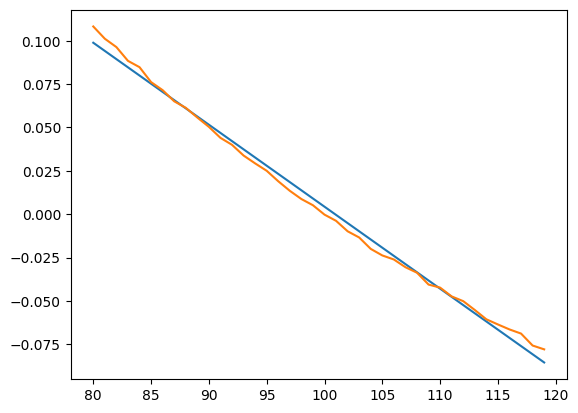

-0.0047259267401628825 0.47690841492909036


In [17]:
def fit_weights(sigma, kappa, trend=0.1, include_trend = False, num_steps=1000, num_simulations=100,range_estim = 20,gamma=0.9):
    
    X = np.arange(100-range_estim, 100+range_estim)
    Y = [f_statio(x,gamma=gamma,num_steps=num_steps,num_simulations=num_simulations,sigma=sigma,kappa=kappa) for x in X]
    X = X.reshape(-1,1)
    model = LinearRegression().fit(X, Y)

    # Extracting the parameters
    a = model.coef_[0]
    b = model.intercept_
    plt.plot(X,a*X+b)
    plt.plot(X,Y)
    plt.show()
    print(a,b)


fit_weights(sigma=10,kappa = 20)